In [1]:
import numpy as np
import itertools 
import matplotlib.pyplot as plt
#from numba import jit
%matplotlib

Using matplotlib backend: Qt5Agg


In [11]:
inicio=[81, 387]
x2=[347, 59]
x3=[81, 318]
x4=[425, 40]
x5=[456, 300]
x6=[194, 11]
x7=[162, 89]
x8=[250, 200]

ciudades=[inicio,x2,x3,x4,x5,x6,x7,x8,inicio]

In [3]:
def getDistance(ciudad1, ciudad2):  #Calcula la distancia entre 2 puntos
    distance = np.sqrt(((ciudad1[0]-ciudad2[0])**2)+((ciudad1[1]-ciudad2[1])**2))
    return(distance)

def matrizDistancias(ciudades):
    n=len(ciudades)
    mat=[[getDistance(ciudades[i],ciudades[j]) for i in range(n)]for j in range(n)]
    return mat

def graficaRuta(ciudades,ruta):
    xs = [ciudades[x-1][0] for x in ruta]
    ys = [ciudades[x-1][1] for x in ruta]
    plt.plot(xs, ys)
    plt.scatter(xs, ys)
    plt.show()
    print(ruta)


La función travel se tomó de https://github.com/DavidVelez/TSP

In [4]:
def travel(w):  

    n = len(w) 
#valor inicial de 0 a todos los demas puntos

    A = {(frozenset([0, i+1]), i+1): (costo, [0, i+1]) for i, costo in enumerate(w[0][1:])}


    for m in range(2, n):
        B = {}
#en esta etapa se usa la recurisividad, ademas se utilizan el modulo 'combinations' que permite realizar
#agrupaciones y comparaciones de datos.         
        for S in [frozenset(C) | {0} for C in itertools.combinations(range(1, n), m)]:
            for j in S - {0}:
#se busca la ruta menos costosa para el viaje, es decir se buscan los valores minimos. 
                B[(S, j)] =min((A[(S-{j},k)][0] + w[k][j], A[(S-{j},k)][1] + [j]) for k in S if k != 0 and k!=j) 
        A = B
        #Ahora se agregan camino inicial y camino final
    res = min([(A[d][0] + w[0][d[1]], A[d][1]) for d in iter(A)])
#Encontrado el valor minimo se tiene la solucion optima.

    Resultado = res[0], [(i+1) for i in  res[1] ] 
#con el ordenamiento de costos, se tiene solo que mostrar cual es la ruta a seguir en el viaje, es decir
#se posicionan las ciudades en relacion con sus costos.

    return Resultado 



In [20]:
mat=matrizDistancias(ciudades)
costo, recorrido = travel(mat)

In [22]:
costo

1379.7279419628046

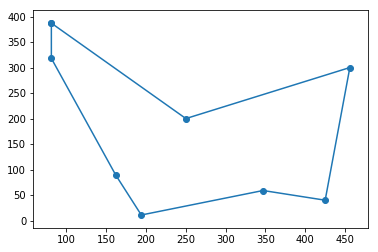

[1, 3, 7, 6, 2, 4, 5, 8, 9]


In [21]:
graficaRuta(ciudades,recorrido)